In [ ]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
from google.colab import drive
from matplotlib.pyplot import figure
from scipy.io.wavfile import write
from IPython.display import Audio 

In [ ]:
File = open('/content/input.txt')
data_array = File.readlines()

In [ ]:
fourier_transform_of_data = np.abs(fft(data_array))

In [ ]:
w = np.arange(0 , 4800000 , 1)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


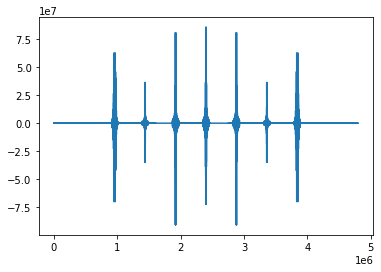

In [ ]:
plt.plot(w,fft(data_array), label = "Sig")

In [ ]:
def middlePassFilter (x,w,c) :
  filter = np.zeros(x.shape , dtype='complex128')
  limit = 24 * 1000;

  for i in w :
    if (((i <= (c + limit)) and (i >= (c - limit))) or ((i <= (-c - limit)) and (i >= (-c + limit)))) :
      filter[i] = 1; 

  res = np.zeros(x.shape , dtype='complex128')
  
  for i in w :
    res[i] = x[i] * filter[i];

  return res;

In [ ]:
cutted_data = middlePassFilter(fourier_transform_of_data,w,96 * 1000)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


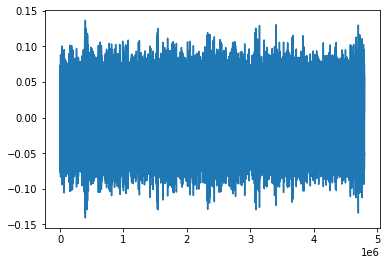

In [ ]:
plt.plot(w,ifft(cutted_data), label = "Sig")

In [ ]:
def write(pass_filter_data):
  file_name = "output.wav"
  f = open(file_name, "w+")
  f.write(str(ifft(cutted_data)))
  f.close()

In [ ]:
write(cutted_data)
Audio("output.wav")